In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [113]:
data = pd.read_csv('./sarah_cleaned_output.csv')
# filter data

data = data.drop(columns=['restaurant'])
data = data.dropna()
# have to reset the index after dropping the null rows or else next cell will error
data = data.reset_index(drop=True)

In [114]:
# TODO Implement these 3 cleaning functions (not always used)
def clean_monetary_value(data):
    if isinstance(data, str):
        cleaned_data = data.replace('$', '').strip()
        cleaned_data = clean_string_with_comma(cleaned_data)
        return float(cleaned_data)
    return data
    
def clean_string_with_comma(data):
    if isinstance(data, str):
        cleaned_data = data.replace(',', '')
        return float(cleaned_data)
    return data

def clean_percentage(data):
    if isinstance(data, str):
        return float(data.strip('%'))
    return data

print(data)

       calories  total_fat  cholesterol  sodium  carbohydrates  dietary_fiber  \
0         370.0       22.0         55.0  1250.0           26.0            2.0   
1         220.0       12.0         25.0  1270.0           22.0            2.0   
2         280.0       15.0         35.0   930.0           26.0            2.0   
3         130.0        7.0         10.0   230.0           14.0            2.0   
4        1560.0      103.0         65.0  1610.0          120.0           12.0   
...         ...        ...          ...     ...            ...            ...   
23704     890.0       60.0        360.0  2910.0            9.0            1.0   
23705    1150.0       62.0        315.0  6540.0           48.0            3.0   
23706     680.0       33.0        100.0  2570.0           49.0            3.0   
23707     780.0       45.0        115.0  3180.0           47.0            3.0   
23708     160.0        0.0          0.0   150.0           40.0            0.0   

       sugar  protein  
0  

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define X and y
X = data.drop('cholesterol', axis=1)
y = data['cholesterol']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

## Results

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# cannot use accuracy score and confusion matrix because this is a regression problem
# this expects discrete classes but we are predicting continuous values
# Calculate regression metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 22.03386740525396
Mean Squared Error: 4025.434133357265
Root Mean Squared Error: 63.4463090601594
R-squared: 0.7378145491659754


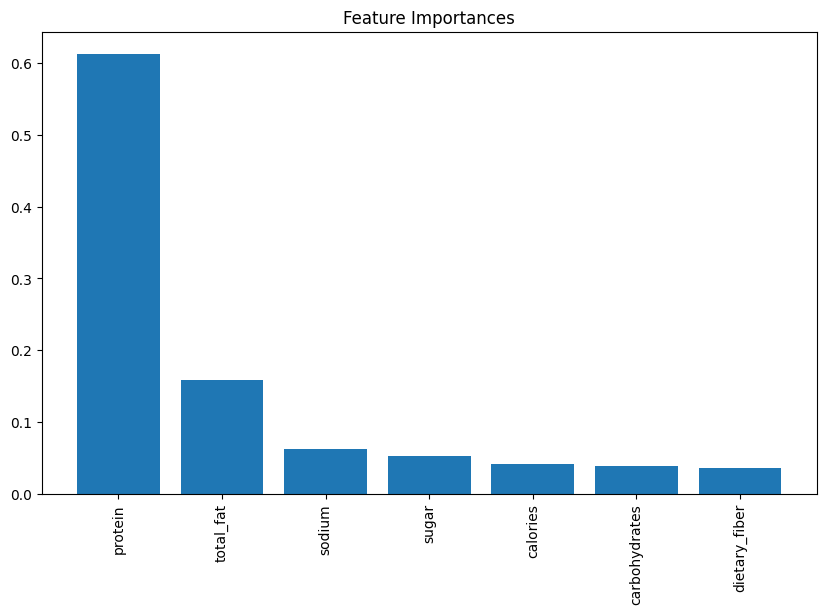

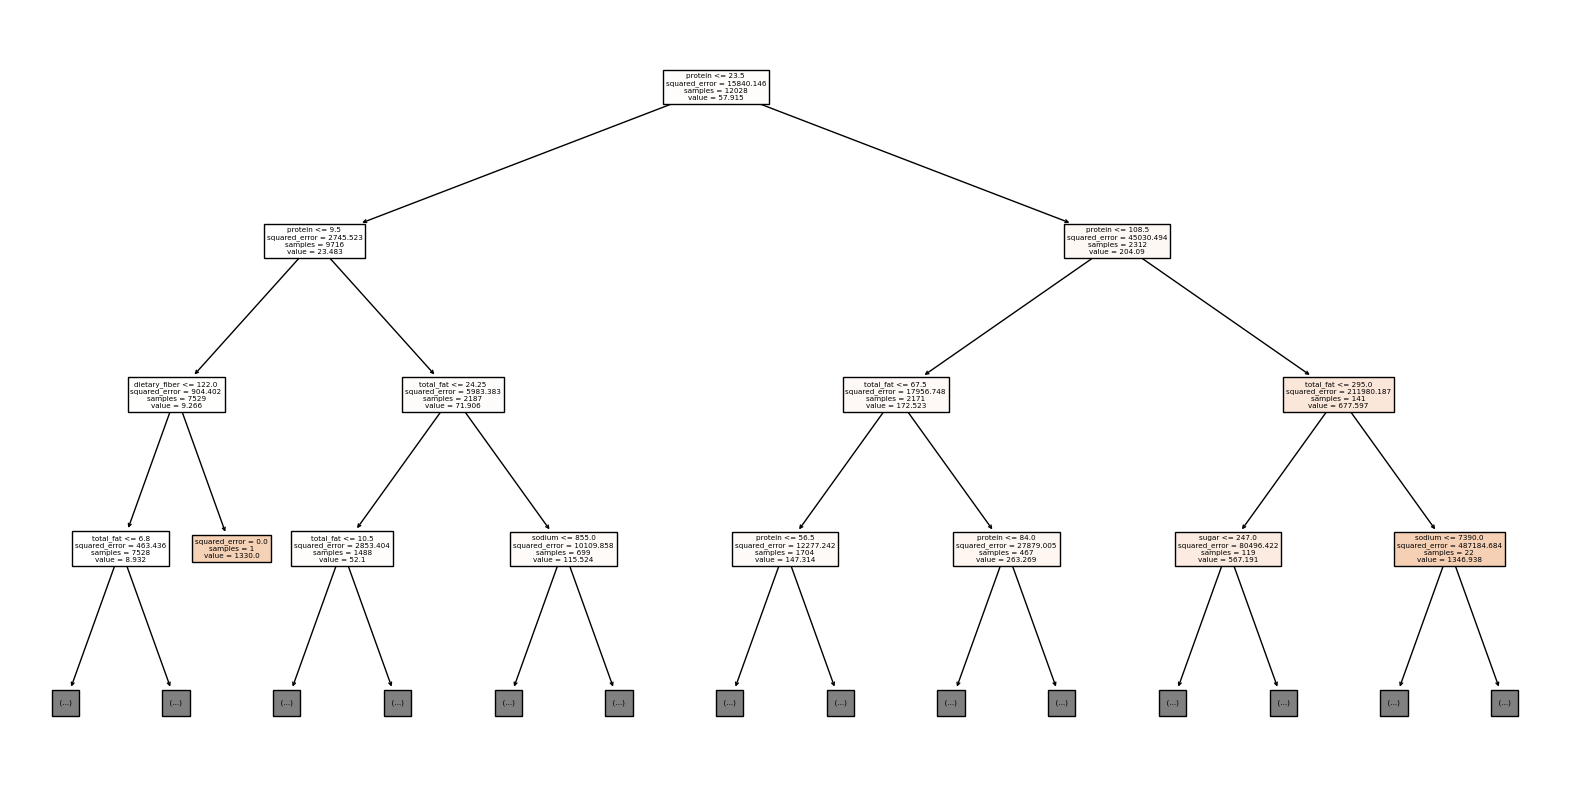

In [117]:
# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

# Visualizing a single tree (Optional)
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)
plt.show()